In [1]:
import math
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from os import listdir
import os.path
from os.path import isdir, isfile
from random import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import soundfile
from xml.etree import ElementTree
from warnings import warn

from onset_detection.read_data import read_data

In [7]:
active_datasets = {'ds1', 'ds2', 'ds3', 'ds4'}
print('Active datasets: ' + str(active_datasets))
X, y = read_data(active_datasets)
print(X.shape)
print(y.shape)
print(sum(y))

Active datasets: {'ds1', 'ds4', 'ds3', 'ds2'}


D:\Users\Michel\Documents\FH\module\8_IP6\git\onset_detection\read_data.py:150: UserWarning: No truth found for AR_Lick11_FN.wav, skipping file.
  warn('No truth found for ' + wav_file + ', skipping file.')
D:\Users\Michel\Documents\FH\module\8_IP6\git\onset_detection\read_data.py:150: UserWarning: No truth found for AR_Lick11_KN.wav, skipping file.
  warn('No truth found for ' + wav_file + ', skipping file.')
D:\Users\Michel\Documents\FH\module\8_IP6\git\onset_detection\read_data.py:150: UserWarning: No truth found for AR_Lick11_MN.wav, skipping file.
  warn('No truth found for ' + wav_file + ', skipping file.')
D:\Users\Michel\Documents\FH\module\8_IP6\git\onset_detection\read_data.py:152: UserWarning: Skipping non-wav file data\IDMT-SMT-GUITAR_V2\dataset2\audio\desktop.ini
  warn('Skipping non-wav file ' + path_to_wav)
D:\Users\Michel\Documents\FH\module\8_IP6\git\onset_detection\read_data.py:150: UserWarning: No truth found for FS_Lick11_FN.wav, skipping file.
  warn('No truth foun

(1171926, 111)
(1171926,)
51536


ds1: (97328, 111)  
ds2: (345916, 111)  
ds3: (5538, 111)  
ds4: (723144, 111)  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# bound = int(len(X)*0.8)
# X_train = X[:bound, :]
# X_test = X[bound:, :]
# y_train = y[:bound]
# y_test = y[bound:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(937540, 111)
(937540,)
(234386, 111)
(234386,)


In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

<br>
<br>
<br>
<br>

In [10]:
onsets = [i for i in range(len(y)) if y[i] == 1]
print(len(onsets))
# print(onsets)

51536


In [11]:
def plot_frame(frame, frame_size):
    fig, ax = plt.subplots(figsize=(4, 4))
    _ = ax.plot(range(len(frame)), frame)
    
    vertical_line_x = frame_size
    while vertical_line_x < len(frame):
        ax.axvline(x=vertical_line_x, color='red')
        vertical_line_x += frame_size

In [12]:
shuffle(onsets)
onsets_part = onsets[:5]
print(onsets_part)

[104997, 1155783, 553038, 1077669, 1073345]


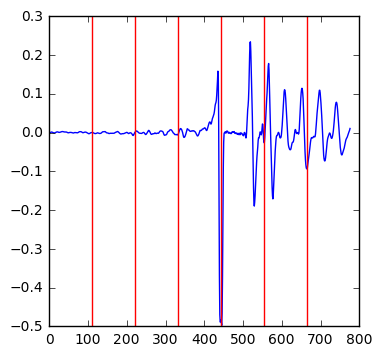

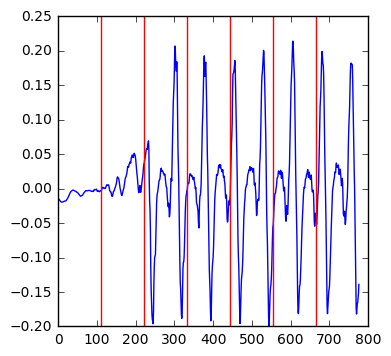

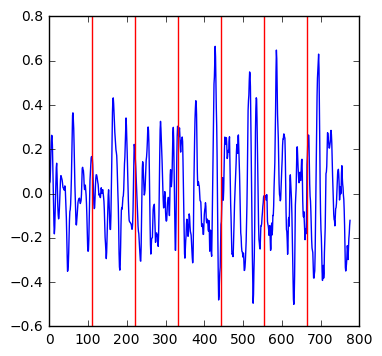

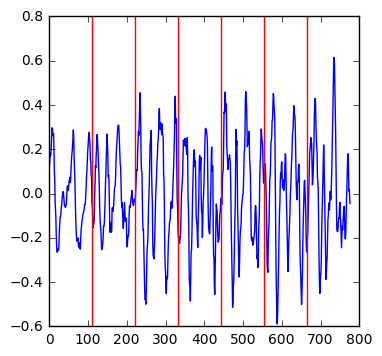

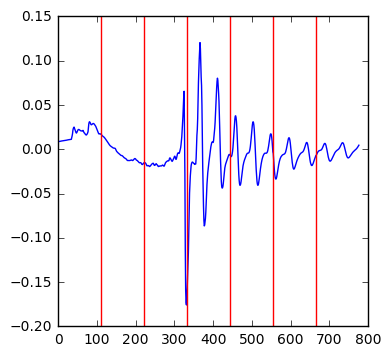

In [13]:
for i in onsets_part:
    plot_frame(np.ravel(X[i-2:i+5, :]), X.shape[1])

Analyse versch. Datasets, Onset Frames, 441 Samples / Frame = 100 Hz

format:
effektiver onset / erster ausschlag
wenn nur ein wert: erster ausschlag

ds1:
[87238, 54493, 58755, 23774, 55508, 48497, 33519, 57751, 90489, 50501]
-2 / 0
-2 / 0
? / -2
? / -2
? / ?
? / -2
-2 / 0
? / ?
-2 / 0
? / -2

uneinheitlich annotiert, z.t. deutlich zu spät

--> -2 bis 0

ds2:
[298003, 321707, 21606, 311640, 123847, 149672, 4183, 42441, 81900, 164420]
3/3
3/4
0/2
0/3
1/4
1/3
0/4
2/3
0/4
1/3

--> 2 bis 4

ds3:
[1605, 1950, 2537, 2611, 1777, 4485, 437, 2983, 2686, 1263]
-4/0
-1/0
0/2
1/2
?/0
?/1
0/1
0/0
1/2
?/0

--> 0 bis 2

ds4:
[219738, 149302, 95957, 657513, 667847, 653544, 654901, 698624, 244043, 340672, 486978, 14403, 553750, 638052, 454921, 627638, 152653, 404285, 485007, 21380]
?/?
?/0
0
?
1
?
?
?
1
1
0
0
0
-2
?
?

--> 0 bis 1

In [ ]:
# subsampling
plot_frame(X[i+6])
plot_frame(X[i+6][::4])

conclusions (dataset 2, 100 Hz frames):<br>
fruehster onset: ab frame 2<br>
spaetester onset: bis und mit frame 5<br>
4x subsampling scheint noch zu passen<br>

min: ab frame 2 (882)
max: bis und mit frame 5 (2646)
4x subsampling scheint noch zu passen

aktuell: 0-440
neu: 441-2204 (4x)
auch möglich: 50 Hz, 882-1763 oder 882-2646 oder schon ab 0
oder: überschneidend
<br>
<br>
<br>
<br>

In [5]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=30)
clf.fit(X_train, y_train)
y_train_predicted = clf.predict(X_train)
y_test_predicted = clf.predict(X_test)

In [ ]:
# ds2
# y: nur frame 0
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

In [ ]:
# ds2
# y: frame 1, 2, 3, 4
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

In [ ]:
# ds2
# y: frame 1, 2, 3, 4
# subsampling: 4x
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

In [ ]:
# ds1 + ds2
# y: frame 1, 2, 3, 4
# subsampling: 4x
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

In [ ]:
# ds1 + ds2
# y: depending on the dataset
# subsampling: 4x
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

In [ ]:
# ds1 + ds2 + ds3
# y: frame 1, 2, 3, 4
# subsampling: 4x
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

In [7]:
# ds1 + ds2 + ds3 + ds4
# y: depending on the dataset
# subsampling: 4x
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    896320
          1       1.00      0.85      0.92     41220

avg / total       0.99      0.99      0.99    937540

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    224070
          1       0.75      0.10      0.18     10316

avg / total       0.95      0.96      0.94    234386



In [6]:
# ds1 + ds2 + ds3 + ds4
# y: depending on the dataset
# subsampling: 4x
# n_estimators=30
print(classification_report(y_train, y_train_predicted))
print(classification_report(y_test, y_test_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    896320
          1       1.00      0.97      0.99     41220

avg / total       1.00      1.00      1.00    937540

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    224070
          1       0.85      0.10      0.19     10316

avg / total       0.96      0.96      0.94    234386

